In [1]:
import csv
import matplotlib.pyplot as plt
import ast
import scipy.stats as stats


In [2]:
result_15steps_Horn="result_15steps_Horn.csv"
result_15steps_Skip="result_15steps_Skip.csv"
result_5steps_Horn="result_5steps_Horn.csv"
result_5steps_Skip="result_5steps_Skip.csv"
original_collision = "OriginalCollision.txt"

In [3]:
def readResult(path,dictionary):
  data={}
  with open(path, 'r') as file:
      reader = csv.reader(file)
      for row in reader:
          if len(row) == 0:
              continue  # Skip empty lines
          key = row[0]
          values = row[1]
          dictionary[key] = values

In [4]:
def calculateAverage(dictionary):
  avg_dirtCollected={}
  avg_collisionCount={}
  avg_timeTaken={}
  simplified_key = {'final_models/DT_15steps':'DT',
                    'final_models/RF_15steps':'RF',
                    'final_models/SVC_15steps':'SVC',
                    'final_models/MLP_15steps':'MLP',
                    'final_models/DT_5steps':'DT',
                    'final_models/RF_5steps':'RF',
                    'final_models/SVC_5steps':'SVC',
                    'final_models/MLP_5steps':'MLP'}
  for key, value in dictionary.items():
    values = ast.literal_eval(value)
    avg_collisionCount[simplified_key[key]] = sum([a[0] for a in values])/len(values)
    avg_dirtCollected[simplified_key[key]] = sum([a[1] for a in values])/len(values)
  return avg_collisionCount,avg_dirtCollected
    

In [5]:
def obtainList(my_dict,choice):
  outputDict = {}
  simplified_key = {'final_models/DT_15steps':'DT',
                    'final_models/RF_15steps':'RF',
                    'final_models/SVC_15steps':'SVC',
                    'final_models/MLP_15steps':'MLP',
                    'final_models/DT_5steps':'DT',
                    'final_models/RF_5steps':'RF',
                    'final_models/SVC_5steps':'SVC',
                    'final_models/MLP_5steps':'MLP'}
  if choice == 0:
    for key, values in my_dict.items():
      values = ast.literal_eval(values)
      outputDict[simplified_key[key]] = [value[0] for value in values]
    return outputDict
  elif choice ==1:
    for key, values in my_dict.items():
      values = ast.literal_eval(values)
      outputDict[simplified_key[key]] = [value[1] for value in values]
    return outputDict
  else:
    return []

In [6]:
#Reading Skip Strategy
skip_5steps={}
skip_15steps={} 
readResult(result_15steps_Skip,skip_15steps)
readResult(result_5steps_Skip,skip_5steps)

In [7]:
#Reading Horn Strategy
horn_5steps={}
horn_15steps={} 
readResult(result_15steps_Horn,horn_15steps)
readResult(result_5steps_Horn,horn_5steps)

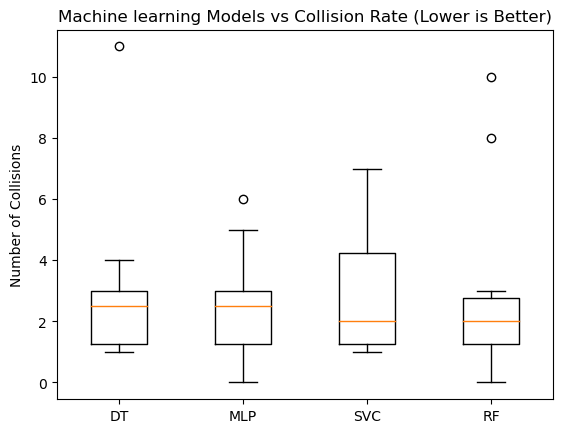

In [8]:
avg_horn_5 = obtainList(horn_5steps,0)
fig, ax = plt.subplots()
ax.boxplot(avg_horn_5.values())
ax.set_xticklabels(avg_horn_5.keys())
ax.set_title('Machine learning Models vs Collision Rate (Lower is Better)')
ax.set_ylabel('Number of Collisions')
plt.show()

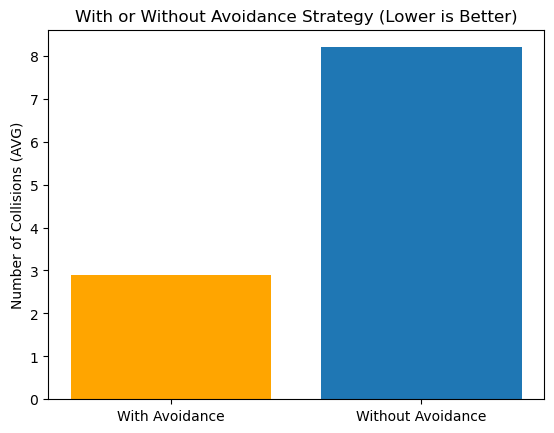

In [9]:
#Comparing With or Without Collision Avoidance Strategy
from matplotlib.colors import LinearSegmentedColormap
colors = ['orange','#1f77b4']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
avg_horn_5,_ = calculateAverage(horn_5steps)
avgCollision = {}
avgCollision['With Avoidance']= sum(avg_horn_5.values())/4

avgCollision['Without Avoidance']= 8.2
y = list(avgCollision.values())
x = avgCollision.keys()
norm = plt.Normalize(min(y), max(y))
plt.bar(x, y, color=cmap(norm(y)))
plt.ylabel('Number of Collisions (AVG)')
plt.title('With or Without Avoidance Strategy (Lower is Better)')
plt.show()

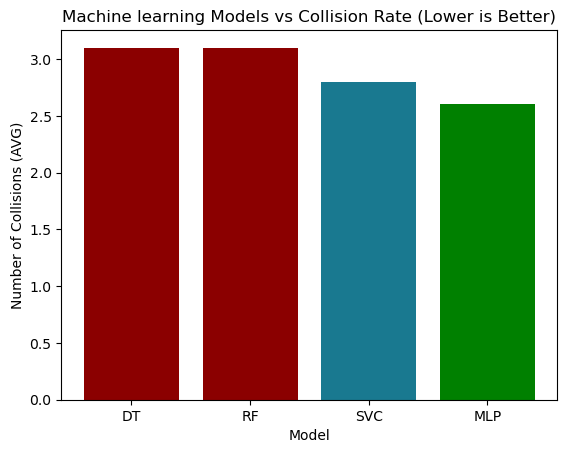

In [10]:
#Comparing Models with Collision Count in 5 steps
from matplotlib.colors import LinearSegmentedColormap
colors = ['green', '#1f77b4', '#8b0000']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
avg_horn_5,_ = calculateAverage(horn_5steps)
sorted_d = dict(sorted(avg_horn_5.items(), key=lambda x: x[1], reverse=True))
x = list(sorted_d.keys())
y = list(sorted_d.values())
norm = plt.Normalize(min(y), max(y))
plt.bar(x, y, color=cmap(norm(y)))
plt.xlabel('Model')
plt.ylabel('Number of Collisions (AVG)')
plt.title('Machine learning Models vs Collision Rate (Lower is Better)')
plt.show()

In [11]:
avg_horn_5 = obtainList(horn_5steps,0)
t_test=[]
temp=[]

for i in avg_horn_5.keys():
  for j in avg_horn_5.keys():
    _,p_value = stats.ttest_ind(avg_horn_5[i],avg_horn_5[j])
    temp.append(p_value)
  print(temp)
  t_test.append(temp)
  temp=[]


[1.0, 0.655458060759121, 0.796716086958552, 1.0]
[0.655458060759121, 1.0, 0.8231513662032348, 0.676764534090788]
[0.796716086958552, 0.8231513662032348, 1.0, 0.8089199233095155]
[1.0, 0.676764534090788, 0.8089199233095155, 1.0]


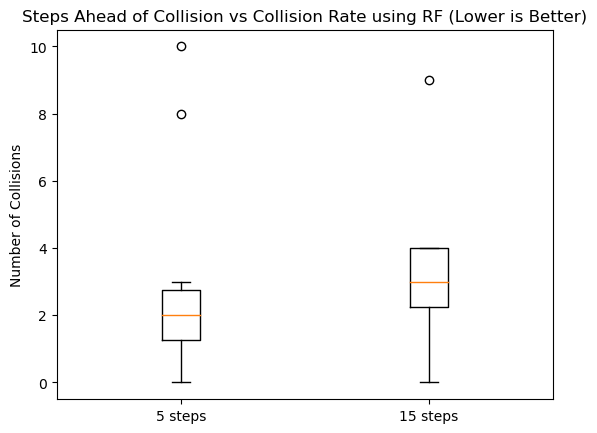

In [12]:
avg_horn_5= obtainList(horn_5steps,0)
avg_horn_15 = obtainList(horn_15steps,0)
fig, ax = plt.subplots()
ax.boxplot([avg_horn_5['RF'],avg_horn_15['RF']])
ax.set_xticklabels(['5 steps','15 steps'])
ax.set_title('Steps Ahead of Collision vs Collision Rate using RF (Lower is Better)')
ax.set_ylabel('Number of Collisions')
plt.show()

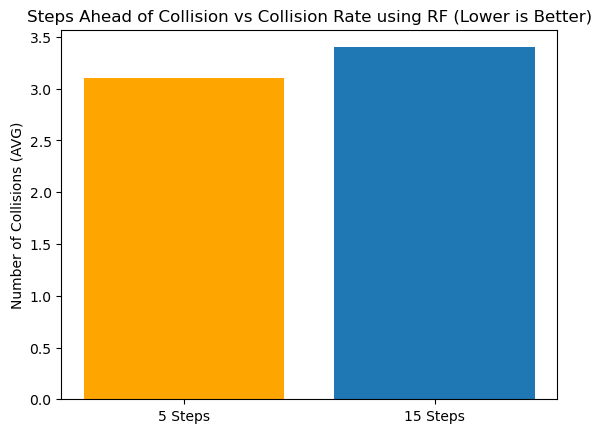

In [13]:
# Comparing 5 step or 15
avg_horn_15,_ = calculateAverage(horn_15steps)
avg_horn_5,_ = calculateAverage(horn_5steps)

x = ["5 Steps","15 Steps"]
y = [avg_horn_5['RF'],avg_horn_15['RF']]
plt.bar(x,y,color=['orange','#1f77b4'])
plt.ylabel('Number of Collisions (AVG)')
plt.title('Steps Ahead of Collision vs Collision Rate using RF (Lower is Better)')
plt.show()

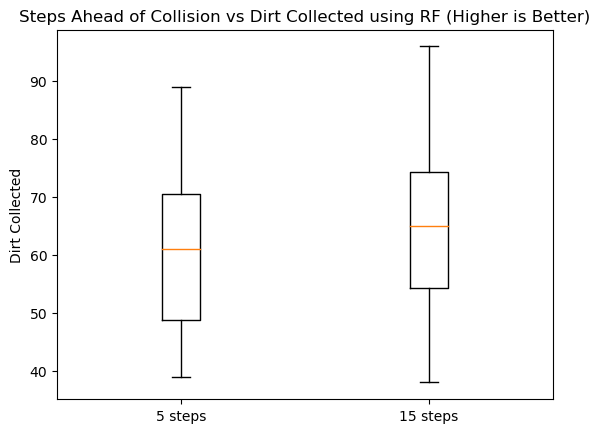

In [14]:
avg_horn_5= obtainList(horn_5steps,1)
avg_horn_15 = obtainList(horn_15steps,1)
fig, ax = plt.subplots()
ax.boxplot([avg_horn_5['RF'],avg_horn_15['RF']])
ax.set_xticklabels(['5 steps','15 steps'])
ax.set_title('Steps Ahead of Collision vs Dirt Collected using RF (Higher is Better)')
ax.set_ylabel('Dirt Collected')
plt.show()

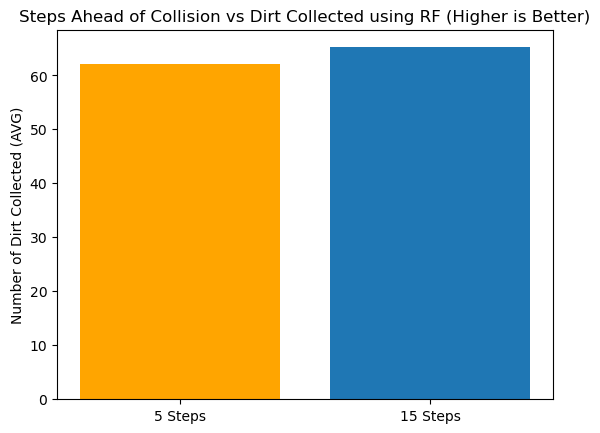

In [15]:
# Comparing 5 step or 15
_,avg_horn_15 = calculateAverage(horn_15steps)
_,avg_horn_5 = calculateAverage(horn_5steps)

x = ["5 Steps","15 Steps"]
y = [avg_horn_5['RF'],avg_horn_15['RF']]
plt.bar(x,y,color = ['orange','#1f77b4'])
plt.ylabel('Number of Dirt Collected (AVG)')
plt.title('Steps Ahead of Collision vs Dirt Collected using RF (Higher is Better)')
plt.show()

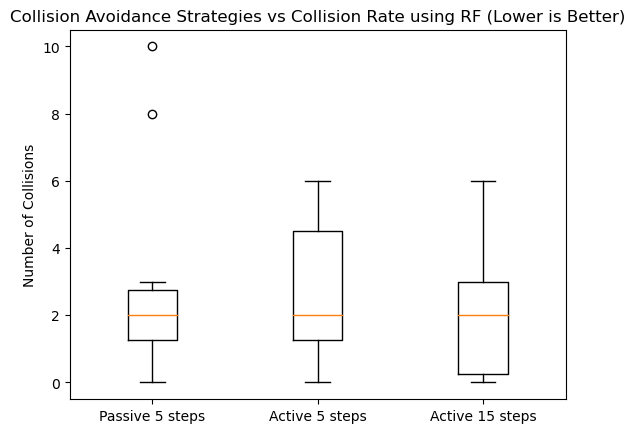

In [16]:
avg_horn_5= obtainList(horn_5steps,0)
avg_skip_5 = obtainList(skip_5steps,0)
avg_skip_15 = obtainList(skip_15steps,0)
fig, ax = plt.subplots()
ax.boxplot([avg_horn_5['RF'],avg_skip_5['RF'],avg_skip_15['RF']])
ax.set_xticklabels(['Passive 5 steps','Active 5 steps','Active 15 steps'])
ax.set_title('Collision Avoidance Strategies vs Collision Rate using RF (Lower is Better)')
ax.set_ylabel('Number of Collisions')
plt.show()

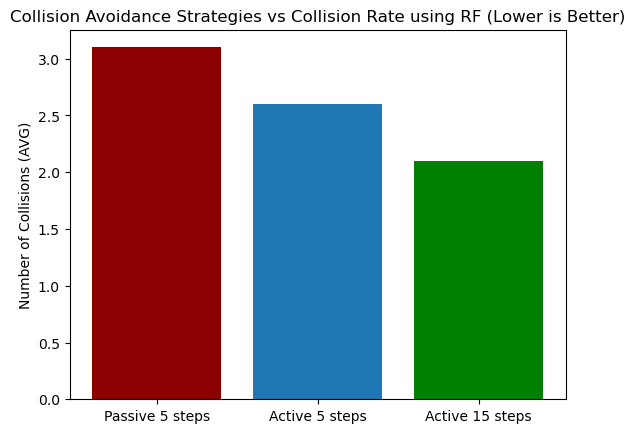

In [17]:
# Comparing 5 step or 15
avg_skip_15,_ = calculateAverage(skip_15steps)
avg_skip_5,_ = calculateAverage(skip_5steps)
avg_horn_5,_ = calculateAverage(horn_5steps)

x = ['Passive 5 steps','Active 5 steps','Active 15 steps']
y = [avg_horn_5['RF'],avg_skip_5['RF'],avg_skip_15['RF']]
plt.bar(x,y,color = ['#8b0000','#1f77b4','green'])
plt.ylabel('Number of Collisions (AVG)')
plt.title('Collision Avoidance Strategies vs Collision Rate using RF (Lower is Better)')
plt.show()


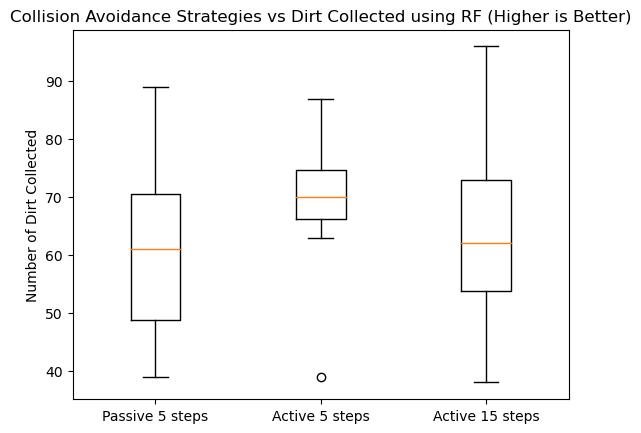

In [18]:
avg_horn_5= obtainList(horn_5steps,1)
avg_skip_5 = obtainList(skip_5steps,1)
avg_skip_15 = obtainList(skip_15steps,1)
fig, ax = plt.subplots()
ax.boxplot([avg_horn_5['RF'],avg_skip_5['RF'],avg_skip_15['RF']])
ax.set_xticklabels(['Passive 5 steps','Active 5 steps','Active 15 steps'])
ax.set_title('Collision Avoidance Strategies vs Dirt Collected using RF (Higher is Better)')
ax.set_ylabel('Number of Dirt Collected')
plt.show()

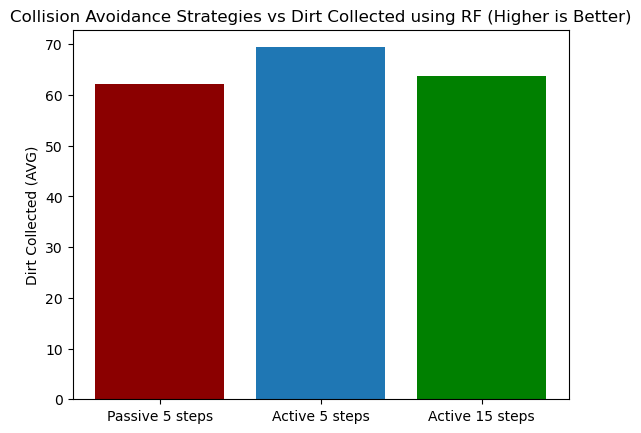

In [19]:
# Comparing 5 step or 15
_,avg_skip_15 = calculateAverage(skip_15steps)
_,avg_skip_5 = calculateAverage(skip_5steps)
_,avg_horn_5 = calculateAverage(horn_5steps)

x = ['Passive 5 steps','Active 5 steps','Active 15 steps']
y = [avg_horn_5['RF'],avg_skip_5['RF'],avg_skip_15['RF']]
plt.bar(x,y,color=['#8b0000','#1f77b4','green'])
plt.ylabel('Dirt Collected (AVG)')
plt.title('Collision Avoidance Strategies vs Dirt Collected using RF (Higher is Better)')
plt.show()